# Problem Case

Optimalisasi harga menggunakan data historis untuk
mengidentifikasi harga paling tepat dari suatu produk atau
layanan yang memaksimalkan profitabilitas perusahaan. Ada
banyak faktor seperti demografi, biaya operasional, data survei,
dll yang berperan dalam penetapan harga yang efisien, hal ini
juga bergantung pada sifat bisnis dan produk yang disajikan.
Bisnis ini secara teratur menambahkan/meningkatkan fitur
untuk memberikan nilai lebih pada produk dan hal ini jelas
memerlukan biaya dalam hal tenaga, waktu, dan yang paling
penting adalah reputasi perusahaan.
Oleh karena itu, penting untuk memahami penetapan harga
yang benar, jika terlalu tinggi, Anda akan kehilangan
pelanggan dan jika terlalu rendah akan mengakibatkan
hilangnya pendapatan. Pengoptimalan harga membantu
bisnis mencapai keseimbangan yang tepat antara penetapan
harga yang efisien, mencapai tujuan keuntungan, dan juga
melayani pelanggan mereka.

# Import Pakage

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


## Load Data Set

In [3]:
df = pd.read_csv("data/harga_retail.csv")
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


## Check Infomarasi data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [5]:
df.isna().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

karena dari sini tidak ada data null,jadi mari kita Meng EDA dari data tersebut.

sebelum nya mari kita drop data yang tidak perlu seperti feature `product_name_lenght` `product_description_lenght` dan `product_photos_qty `

In [6]:
df.drop(["product_name_lenght","product_description_lenght","product_photos_qty",
         "product_id","comp_1","comp_2","comp_3","ps1", "ps2", "ps3","fp1", "fp2", "fp3",
         "lag_price","s"],axis=1,inplace=True)

In [7]:
df

,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,volume
0,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,350,4.0,57,23,8,1,5,2017,3800
1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,350,4.0,61,22,8,1,6,2017,3800
2,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,350,4.0,123,21,10,1,7,2017,3800
3,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,350,4.0,90,23,8,1,8,2017,3800
4,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,350,4.0,54,21,9,1,9,2017,3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,9750,4.4,57,23,8,1,5,2017,12600
672,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,9750,4.4,61,22,8,1,6,2017,12600
673,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,9750,4.4,123,21,10,1,7,2017,12600
674,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,9750,4.4,90,23,8,1,8,2017,12600


In [8]:
# change datatype from string to datetime
date_time = pd.to_datetime(df["month_year"])
df["month_year"] = date_time
df["month_year"]

0     2017-01-05
1     2017-01-06
2     2017-01-07
3     2017-01-08
4     2017-01-09
         ...    
671   2017-01-05
672   2017-01-06
673   2017-01-07
674   2017-01-08
675   2017-01-09
Name: month_year, Length: 676, dtype: datetime64[ns]

setelah itu kita membagi analisis data nya dengan 

## Mengetahui kategori favorit

In [9]:
total_counts = df.groupby("product_category_name")["year"].count().reset_index(name='total_counts')
# gabungkan data total_coint dengan data and sort them data
count_trend = df.merge(total_counts, on="product_category_name").sort_values(by="total_counts",ascending=False)
count_trend

,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,volume,total_counts
156,garden_tools,2017-01-09,23,1377.70,18.643478,59.900000,1500,4.0,115,21,9,1,9,2017,19800,160
152,garden_tools,2017-01-05,7,419.30,15.794286,59.900000,1500,4.0,34,23,8,1,5,2017,19800,160
141,garden_tools,2017-01-11,13,2339.87,43.141538,179.990000,7650,4.2,339,22,8,4,11,2017,8000,160
142,garden_tools,2017-01-12,15,2759.85,47.594000,183.990000,7650,4.2,184,21,10,1,12,2017,8000,160
143,garden_tools,2018-01-01,14,2629.96,38.537857,187.854286,7650,4.2,137,23,8,2,1,2018,8000,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,consoles_games,2018-01-01,10,271.20,13.319000,27.033333,100,3.9,9,23,8,2,1,2018,2304,22
240,consoles_games,2018-01-02,1,32.50,11.850000,32.500000,100,3.9,6,20,8,2,2,2018,2304,22
241,consoles_games,2018-01-03,7,229.20,14.027143,32.742857,100,3.9,13,22,9,1,3,2018,2304,22
242,consoles_games,2018-01-04,6,205.20,15.015000,34.200000,100,3.9,13,21,9,1,4,2018,2304,22


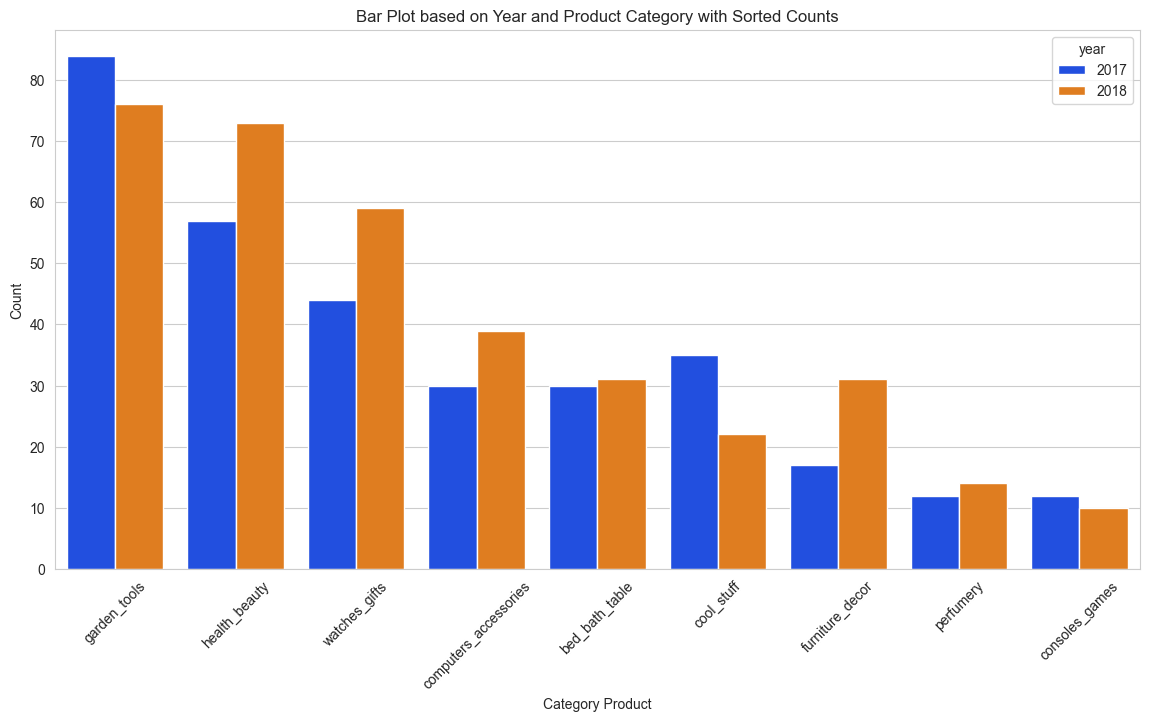

In [10]:
plt.figure(figsize=(14, 7))
sns.countplot(x="product_category_name", data=count_trend, hue="year", palette="bright")

# Resetting labels
plt.xlabel("Category Product")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.title("Bar Plot based on Year and Product Category with Sorted Counts")
plt.show()

dari visual tersebut bahwa urutan treand kebutuhan dari tahun `2018` dengan `2017`,mengalami beberapa kebutuhan kosumen yang berbeda.


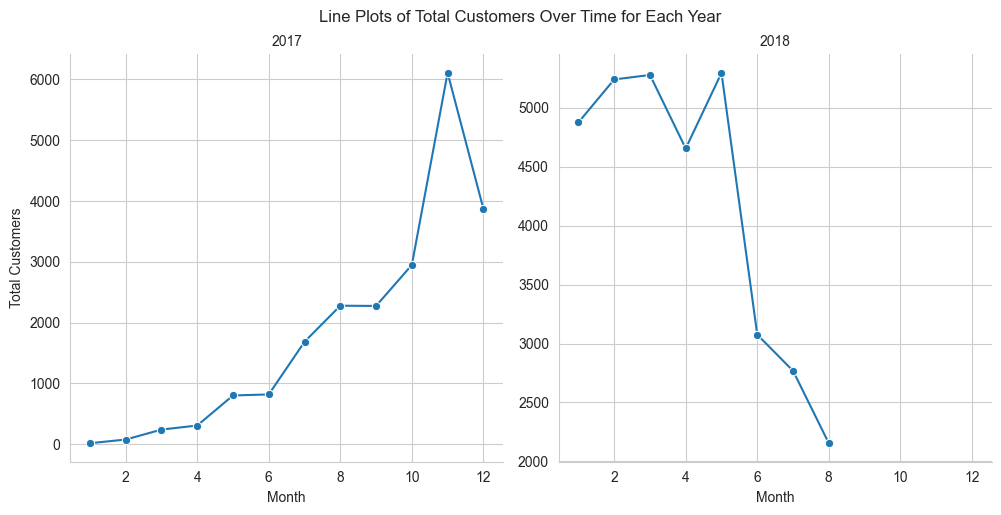

In [11]:
# kita assimkan banyaknya kosument terhadap waktu dari 2018-2017
count_cosument_by_time = df.groupby(["month","year"])["customers"].sum().reset_index()
# buatkan plot figure FacetGrid pada setiap tahunnya
g = sns.FacetGrid(count_cosument_by_time, col="year", col_wrap=3, height=5, sharey=False)
g.map(sns.lineplot, "month", "customers", marker="o")
g.set_axis_labels("Month", "Total Customers")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Line Plots of Total Customers Over Time for Each Year",y=1.02,x=.35)
plt.show()

dari sini kita bisa bilang bahwa jumlah kosumen pada tahun 2018 tidak sebanyak tahun 2017

## Menghitung kepuasan pelagan bedasarkan Kategori Produk 

In [12]:
count_score_cat_prod = df.groupby("product_category_name")["product_score"].mean().reset_index(name="total_counts").round(3)
count_score_cat_prod = count_score_cat_prod.sort_values(by="total_counts",ascending=False)
count_score_cat_prod

,product_category_name,total_counts
7,perfumery,4.350
3,cool_stuff,4.207
5,garden_tools,4.162
6,health_beauty,4.145
2,consoles_games,4.064
1,computers_accessories,3.986
8,watches_gifts,3.983
4,furniture_decor,3.979
0,bed_bath_table,3.908


C:\Users\iqbal\AppData\Local\Temp\ipykernel_19196\886603600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='product_category_name', y='total_counts', data=count_score_cat_prod, palette='viridis')


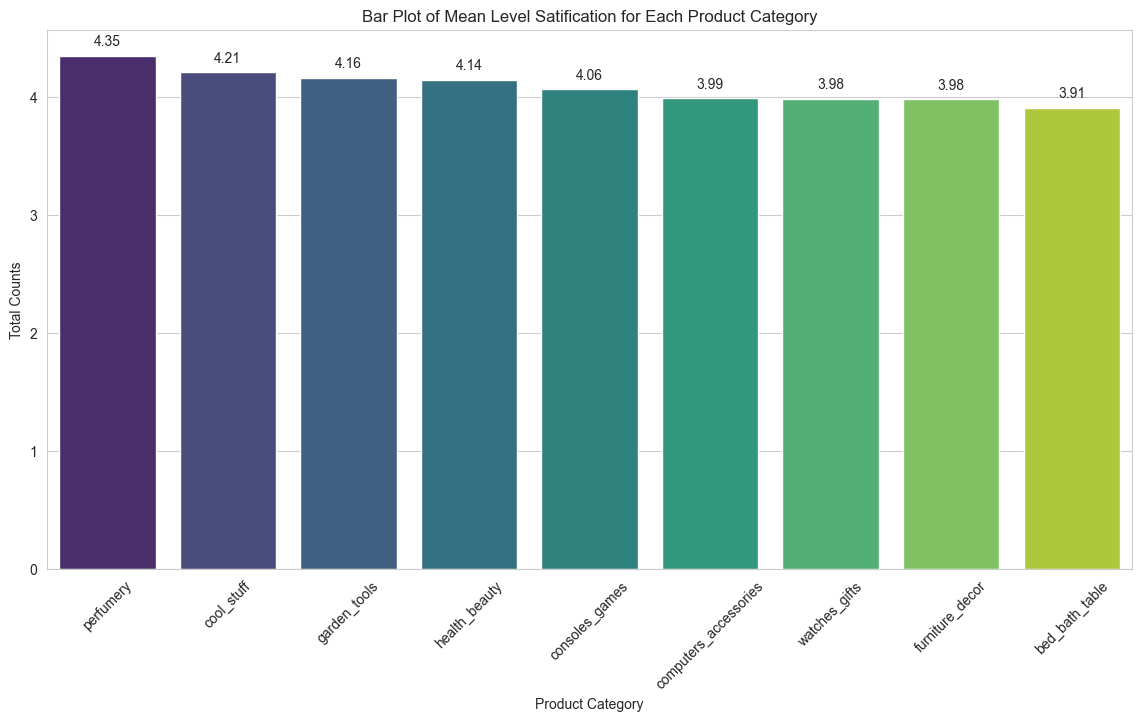

In [13]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='product_category_name', y='total_counts', data=count_score_cat_prod, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.xlabel('Product Category')
plt.ylabel('Total Counts')
plt.title('Bar Plot of Mean Level Satification for Each Product Category')
plt.show()

jadi sini bahwa category Product yang memiliki tingkat kupuasan pelaggan yang tertinggi jatuh pada `perfumery`

## Feature Selection 

let me cook :V

dari sini kita tahu bahwa,fitur-fitur mana aja yang sifatnya dependent maupun independent

#### independent
 - product_category_name
 - qty
 - unit price
 - product_weight_g
 - volume

#### dependent
 - freight_price

In [15]:
X = df[["product_category_name","qty","unit_price","product_weight_g","volume"]]
y = df["freight_price"]
X.head()

,product_category_name,qty,unit_price,product_weight_g,volume
0,bed_bath_table,1,45.95,350,3800
1,bed_bath_table,3,45.95,350,3800
2,bed_bath_table,6,45.95,350,3800
3,bed_bath_table,4,45.95,350,3800
4,bed_bath_table,2,45.95,350,3800


In [16]:
y.head()

0    15.100000
1    12.933333
2    14.840000
3    14.287500
4    15.100000
Name: freight_price, dtype: float64